In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy.signal import lfilter, firls, decimate

In [4]:
resDir = Path("../results")
dataDir = Path("../data")

In [5]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

# 1. Obtain data after HPF

In [6]:
fs = 0.5 #sampling frequency
fmin = 0.009 # 
fmax = 0.08
hbp = firls(21, np.array([0, 0.009, 0.01, 0.08, 0.09, 0.8]), #0.8
           desired = np.array([0, 0, 1, 1, 0, 0]))

In [7]:
num = 243
fMRIsHPF = []
for i in range(num):
    cfMRI = fMRIs[0, i]["fMRI"][:90, :]
    # detrend
    cfMRI = detrend(cfMRI)
    chpffMRI = lfilter(hbp, 1, cfMRI)
    fMRIsHPF.append(chpffMRI[:, 25:])

### sample plots 

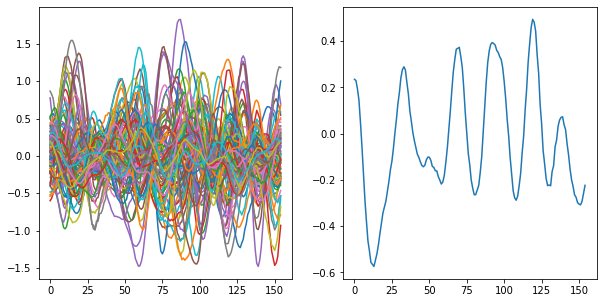

In [8]:
plt.figure(figsize=[10, 5])
plt.subplot(121)
for i in range(90):
    plt.plot(fMRIsHPF[4][i, :])
    
plt.subplot(122)
plt.plot(fMRIsHPF[4][10, :])

In [9]:
kappas = np.arange(0.68, 4, 0.01)
ranks = [2, 4, 6, 8, 10, 12]

# 2. data 9

In [11]:
Ymat = fMRIsHPF[9]
Lmin = 15
lamb = 1e-4

In [12]:
res = TVDNRankTuning(ranks=ranks, kappas=kappas, Ymat=Ymat, dataType="fMRI", saveDir=None, Lmin=Lmin, lamb=lamb)

The current rank is 2.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 2}



The current rank is 4.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 4}



The current rank is 6.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 6}



The current rank is 8.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 8}



The current rank is 10.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 10}



The current rank is 12.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 12}


In [14]:
optDet = res.DetectObj

In [16]:
print(optDet)

+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 22.  37.  56.  83.  98. 113. 128.] | 0.9854625402907398 |  2   |
+-------------+--------------------------------------+--------------------+------+


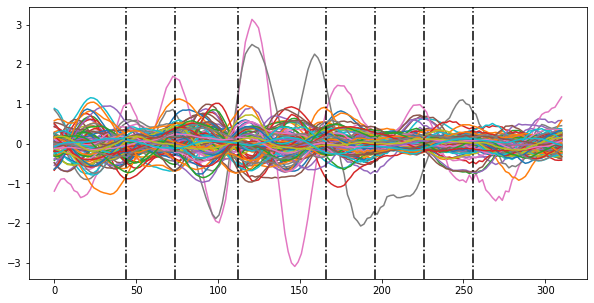

In [15]:
optDet.PlotEcpts()

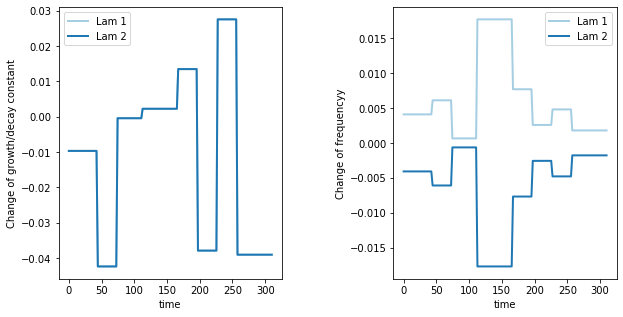

In [17]:
optDet.PlotEigenCurve()

The plot indices are [26 40 55 35  9].


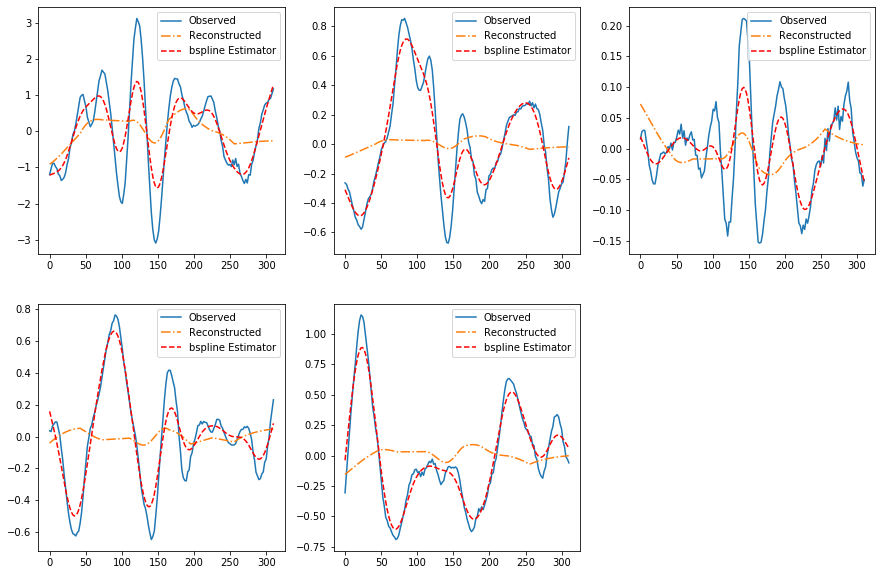

array([26, 40, 55, 35,  9])

In [19]:
optDet.PlotRecCurve(is_smoothCurve=1)

# 2. data 90

In [20]:
Ymat = fMRIsHPF[90]
Lmin = 15
lamb = 1e-4

In [21]:
res = TVDNRankTuning(ranks=ranks, kappas=kappas, Ymat=Ymat, dataType="fMRI", saveDir=None, Lmin=Lmin, lamb=lamb)

The current rank is 2.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 2}



The current rank is 4.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 4}



The current rank is 6.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 6}



The current rank is 8.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 8}



The current rank is 10.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 10}



The current rank is 12.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 12}


In [22]:
optDet = res.DetectObj

In [23]:
print(optDet)

+-------------+---------------------------------+-------------------+------+
| Num of CPTs |          Estiamted CPTs         |        MSE        | Rank |
+-------------+---------------------------------+-------------------+------+
|      6      | [ 20.  42.  59.  83. 107. 131.] | 3.059068019466118 |  10  |
+-------------+---------------------------------+-------------------+------+


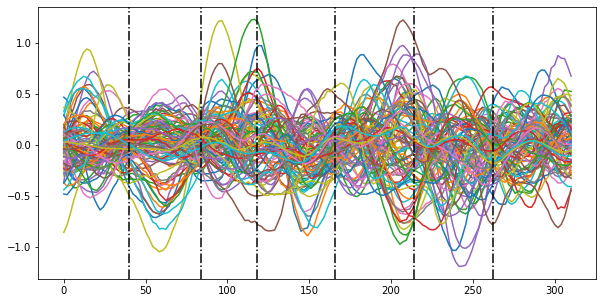

In [24]:
optDet.PlotEcpts()

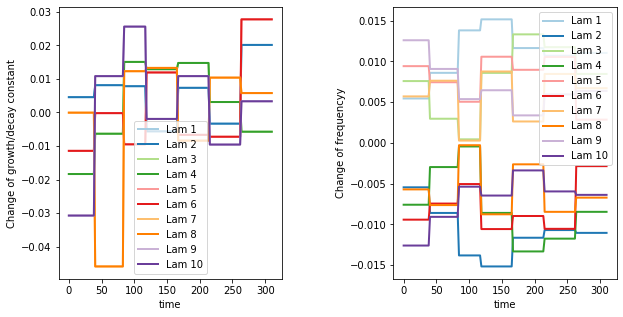

In [25]:
optDet.PlotEigenCurve()

The plot indices are [ 6 60 74 49 53].


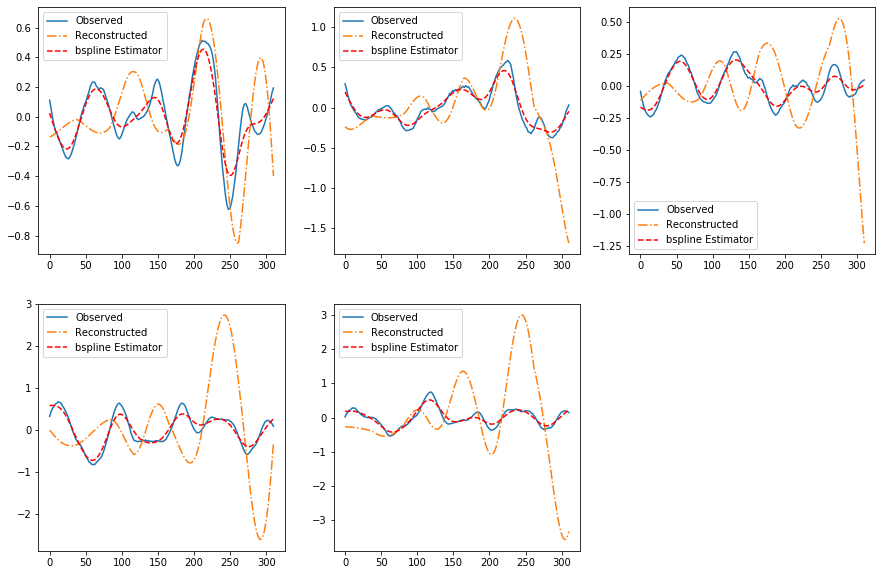

array([ 6, 60, 74, 49, 53])

In [26]:
optDet.PlotRecCurve(is_smoothCurve=1)

# 2. data 190

In [27]:
Ymat = fMRIsHPF[190]
Lmin = 15
lamb = 1e-4

In [28]:
res = TVDNRankTuning(ranks=ranks, kappas=kappas, Ymat=Ymat, dataType="fMRI", saveDir=None, Lmin=Lmin, lamb=lamb)

The current rank is 2.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 2}



The current rank is 4.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 4}



The current rank is 6.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 6}



The current rank is 8.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 8}



The current rank is 10.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 10}



The current rank is 12.
The parameters for detection are:
{'Lmin': 15,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRI',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 0.68,
 'lamb': 0.0001,
 'nbasis': 10,
 'r': 12}


In [29]:
optDet = res.DetectObj

In [30]:
print(optDet)

+-------------+---------------------------------+--------------------+------+
| Num of CPTs |          Estiamted CPTs         |        MSE         | Rank |
+-------------+---------------------------------+--------------------+------+
|      6      | [ 19.  45.  60.  75. 100. 129.] | 0.9691201819127019 |  2   |
+-------------+---------------------------------+--------------------+------+


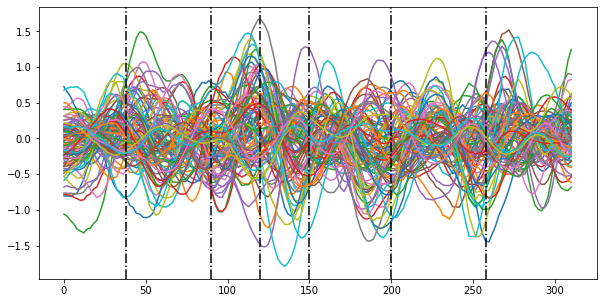

In [31]:
optDet.PlotEcpts()

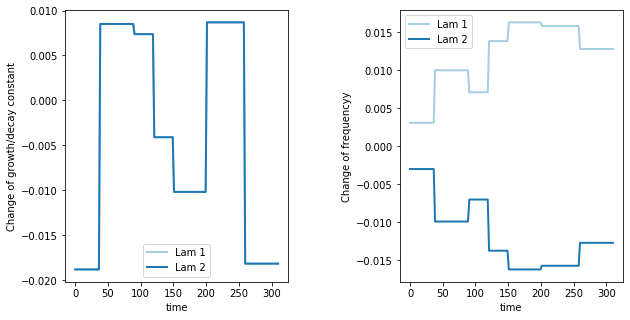

In [32]:
optDet.PlotEigenCurve()

The plot indices are [22 80 14 18 50].


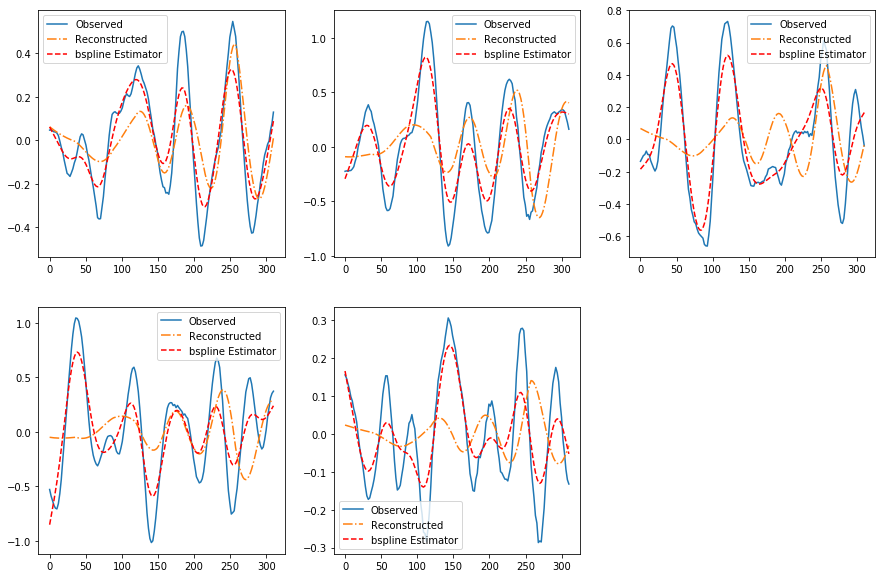

array([22, 80, 14, 18, 50])

In [33]:
optDet.PlotRecCurve(is_smoothCurve=1)